In [1]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json
plt.rcParams.update({"font.size": 12})
%matplotlib inline

In [2]:
!pip install -U sentence-transformers

     |████████████████████████████████| 78 kB 1.6 MB/s 
     |████████████████████████████████| 3.4 MB 8.4 MB/s 
     |████████████████████████████████| 6.8 MB 37.2 MB/s 
     |████████████████████████████████| 1.2 MB 10.5 MB/s 
     |████████████████████████████████| 61 kB 201 kB/s 
     |████████████████████████████████| 596 kB 35.8 MB/s 
     |████████████████████████████████| 895 kB 33.1 MB/s 
     |████████████████████████████████| 3.3 MB 20.2 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.1.0-py3-none-any.whl size=121000 sha256=1a069d7b561d804f3eb53496941f81b1216a910b1f0a24d62b78391de702b943
  Stored in directory: /root/.cache/pip/wheels/90/f0/bb/ed1add84da70092ea526466eadc2bfb197c4bcb8d4fa5f7bad
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [3]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')


Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.69k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/314 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
df = pd.read_csv("/content/drive/MyDrive/stocks/stocks_submissions_all.csv", sep=";")
df['created_utc'] = pd.to_datetime(df['created_utc'], unit='s')
df.index = pd.DatetimeIndex(df.created_utc)
df.tail()

,Unnamed: 0,author,created_utc,id,link_flair_text,num_comments,score,subreddit_subscribers,selftext,title,upvote_ratio
created_utc,,,,,,,,,,,
2018-12-30 02:45:51,154501,ChowSu,2018-12-30 02:45:51,aarxpu,NaN,13,1,306865,NaN,Stocks and taxes?,0.0
2018-12-30 02:29:05,154502,analyst_84,2018-12-30 02:29:05,aart2j,NaN,25,1,306864,NaN,Best of 2018 returns,0.0
2018-12-30 01:57:05,154503,01Cloud01,2018-12-30 01:57:05,aark2v,NaN,9,1,306855,NaN,Best bear ETFs,0.0
2018-12-30 01:32:01,154504,SilverInitiatives,2018-12-30 01:32:01,aarcpu,NaN,34,1,306853,NaN,Theoretical: Shouldn't stock prices be infinity?,0.0
2018-12-30 00:26:31,154505,19392o3o3u2,2018-12-30 00:26:31,aaqssi,NaN,4,1,306831,NaN,I need advice from a profesional,0.0


In [9]:
df=df.rename(columns={"Unnamed: 0": "SegmentID"})

In [10]:
df.head()

,SegmentID,author,created_utc,id,link_flair_text,num_comments,score,subreddit_subscribers,selftext,title,upvote_ratio
created_utc,,,,,,,,,,,
2021-11-26 13:19:32,0,NovelAnteater,2021-11-26 13:19:32,r2nb9a,NaN,0,1,3310630,[removed],SNAP seems like a great long-term buy at this ...,1.0
2021-11-26 12:37:50,1,VonDerBerg,2021-11-26 12:37:50,r2ma8u,Trades,0,1,3310546,So the markets are tanking on new variant news...,$NVAX new variant,1.0
2021-11-26 12:36:24,2,VonDerBerg,2021-11-26 12:36:24,r2m96j,Trades,0,1,3310543,[removed],$NVAX new variant,1.0
2021-11-26 12:29:36,3,VonDerBerg,2021-11-26 12:29:36,r2m3di,Trades,0,1,3310525,[removed],$NVAX lift-off confirmed,1.0
2021-11-26 12:10:01,4,ghdsvor,2021-11-26 12:10:01,r2lrdw,Advice Request,0,1,3310479,[removed],Where to find dates that annual reports were p...,1.0


In [9]:
#Sentences are encoded by calling model.encode() #https://www.sbert.net/
#import re
#df_title = df["title"].apply(lambda title: re.sub(r"http\S+", "", title).lower(), 1)
#df_title[5000]
#embeddings = model.encode(df_title.tolist())

In [2]:
import pickle
#Store sentences & embeddings on disc
#with open('/content/drive/MyDrive/stocks/embeddings.pkl', "wb") as fOut:
#    pickle.dump({'sentences': df_title.tolist(), 'embeddings': embeddings}, fOut, protocol=pickle.HIGHEST_PROTOCOL)

#Load sentences & embeddings from disc
with open('/content/drive/MyDrive/stocks/embeddings.pkl', "rb") as fIn:
    stored_data = pickle.load(fIn)
    stored_sentences = stored_data['sentences']
    stored_embeddings = stored_data['embeddings']

In [3]:
"""
This is a more complex example on performing clustering on large scale dataset.
This examples find in a large set of sentences local communities, i.e., groups of sentences that are highly
similar. You can freely configure the threshold what is considered as similar. A high threshold will
only find extremely similar sentences, a lower threshold will find more sentence that are less similar.
A second parameter is 'min_community_size': Only communities with at least a certain number of sentences will be returned.
The method for finding the communities is extremely fast, for clustering 50k sentences it requires only 5 seconds (plus embedding comuptation).

"""
from sentence_transformers import SentenceTransformer, util
import os
import csv
import time

titles = stored_sentences[0:50000]

print("Start clustering")
start_time = time.time()

#Two parameters to tune:
#min_cluster_size: Only consider cluster that have at least 100 elements
#threshold: Consider sentence pairs with a cosine-similarity larger than threshold as similar
clusters = util.community_detection(stored_embeddings[0:50000], min_community_size=200, threshold=0.70)

print("Clustering done after {:.2f} sec".format(time.time() - start_time))

#Print for all clusters the top 3 and bottom 3 elements
for i, cluster in enumerate(clusters):
    print("\nCluster {}, #{} Elements ".format(i+1, len(cluster)))
    for sentence_id in cluster[0:3]:
        print("\t", titles[sentence_id])
    print("\t", "...")
    for sentence_id in cluster[-3:]:
        print("\t", titles[sentence_id])


Start clustering
Clustering done after 63.75 sec

Cluster 1, #768 Elements 
	 new to stocks. looking for some advice.
	 new to stocks, and need advice and help
	 new to stocks, need advice
	 ...
	 advice on the best stocks to invest in after elections
	 challenge: tell me what stock to buy!
	 challenge: tell me what stock to buy!

Cluster 2, #299 Elements 
	 r/stocks daily discussion &amp; fundamentals friday aug 27, 2021
	 r/stocks daily discussion &amp; fundamentals friday aug 13, 2021
	 r/stocks daily discussion &amp; fundamentals friday aug 20, 2021
	 ...
	 r/stocks daily thread on meme stocks wednesday - oct 27, 2021
	 r/stocks daily thread on meme stocks thursday - oct 28, 2021
	 r/stocks daily thread on meme stocks friday - nov 12, 2021


In [6]:
print("Start clustering")
start_time = time.time()

#Two parameters to tune:
#min_cluster_size: Only consider cluster that have at least 100 elements
#threshold: Consider sentence pairs with a cosine-similarity larger than threshold as similar
clusters = util.community_detection(stored_embeddings[0:50000], min_community_size=150, threshold=0.70)

print("Clustering done after {:.2f} sec".format(time.time() - start_time))

#Print for all clusters the top 3 and bottom 3 elements
for i, cluster in enumerate(clusters):
    print("\nCluster {}, #{} Elements ".format(i+1, len(cluster)))
    for sentence_id in cluster[0:3]:
        print("\t", titles[sentence_id])
    print("\t", "...")
    for sentence_id in cluster[-3:]:
        print("\t", titles[sentence_id])

Start clustering
Clustering done after 49.65 sec

Cluster 1, #768 Elements 
	 new to stocks. looking for some advice.
	 new to stocks, and need advice and help
	 new to stocks, need advice
	 ...
	 advice on the best stocks to invest in after elections
	 challenge: tell me what stock to buy!
	 challenge: tell me what stock to buy!

Cluster 2, #299 Elements 
	 r/stocks daily discussion &amp; fundamentals friday aug 27, 2021
	 r/stocks daily discussion &amp; fundamentals friday aug 13, 2021
	 r/stocks daily discussion &amp; fundamentals friday aug 20, 2021
	 ...
	 r/stocks daily thread on meme stocks wednesday - oct 27, 2021
	 r/stocks daily thread on meme stocks thursday - oct 28, 2021
	 r/stocks daily thread on meme stocks friday - nov 12, 2021

Cluster 3, #193 Elements 
	 here is a market recap for today wednseday, nov 10, 2021
	 here is a market recap for today friday, november 12, 2021
	 here is a market recap for today friday, october 15, 2021
	 ...
	 preparation for trading day - j

In [7]:
print("Start clustering")
start_time = time.time()

#Two parameters to tune:
#min_cluster_size: Only consider cluster that have at least 100 elements
#threshold: Consider sentence pairs with a cosine-similarity larger than threshold as similar
clusters = util.community_detection(stored_embeddings[0:50000], min_community_size=100, threshold=0.70)

print("Clustering done after {:.2f} sec".format(time.time() - start_time))

#Print for all clusters the top 3 and bottom 3 elements
for i, cluster in enumerate(clusters):
    print("\nCluster {}, #{} Elements ".format(i+1, len(cluster)))
    for sentence_id in cluster[0:3]:
        print("\t", titles[sentence_id])
    print("\t", "...")
    for sentence_id in cluster[-3:]:
        print("\t", titles[sentence_id])

Start clustering
Clustering done after 56.98 sec

Cluster 1, #768 Elements 
	 new to stocks. looking for some advice.
	 new to stocks, and need advice and help
	 new to stocks, need advice
	 ...
	 advice on the best stocks to invest in after elections
	 challenge: tell me what stock to buy!
	 challenge: tell me what stock to buy!

Cluster 2, #299 Elements 
	 r/stocks daily discussion &amp; fundamentals friday aug 27, 2021
	 r/stocks daily discussion &amp; fundamentals friday aug 13, 2021
	 r/stocks daily discussion &amp; fundamentals friday aug 20, 2021
	 ...
	 r/stocks daily thread on meme stocks wednesday - oct 27, 2021
	 r/stocks daily thread on meme stocks thursday - oct 28, 2021
	 r/stocks daily thread on meme stocks friday - nov 12, 2021

Cluster 3, #193 Elements 
	 here is a market recap for today wednseday, nov 10, 2021
	 here is a market recap for today friday, november 12, 2021
	 here is a market recap for today friday, october 15, 2021
	 ...
	 preparation for trading day - j

In [49]:
stored_sentences[50]

'opinions on $bx?'

In [17]:
author_list =df[df['SegmentID'] < 500]['author'][:][0:500].tolist()

In [50]:
stored_embeddings[50]

array([-6.78072572e-01,  2.22704969e-02, -2.03746617e-01, -6.10289127e-02,
       -3.95351082e-01, -1.37423754e-01,  4.30929810e-01,  5.56074142e-01,
       -3.76442671e-02, -5.17614424e-01, -2.41582453e-01,  8.10952961e-01,
        1.73517138e-01, -3.51959169e-01, -3.63048673e-01,  1.34584382e-01,
        6.24484360e-01, -4.37712014e-01, -5.33524454e-01,  3.08063537e-01,
       -8.44475806e-01, -6.57446682e-01,  2.81465411e-01,  1.76583365e-01,
       -6.00880869e-02,  1.26864612e-01,  2.73588926e-01,  4.56960857e-01,
        9.79986489e-02, -3.35749388e-02,  1.18324384e-01,  3.72064620e-01,
        1.64262027e-01, -5.60499132e-01, -7.29852840e-02,  2.52345979e-01,
        4.71505076e-01, -3.86669226e-02, -8.73118564e-02,  2.93780088e-01,
       -7.30305016e-02,  4.44740236e-01,  1.42497420e-01,  1.91792712e-01,
        1.62256777e-01, -4.26877826e-01,  3.29479635e-01, -1.43508211e-01,
       -2.60742664e-01,  2.23326012e-01,  3.06719899e-01, -1.80415660e-01,
       -3.40843558e-01,  

In [13]:
from sklearn.cluster import AgglomerativeClustering
# Normalize the embeddings to unit length
corpus_embeddings = stored_embeddings[0:5000] /  np.linalg.norm(stored_embeddings[0:5000], axis=1, keepdims=True)
titles = stored_sentences[0:5000]
# Perform kmean clustering
clustering_model = AgglomerativeClustering(n_clusters=None,affinity='cosine',linkage='average',  distance_threshold=0.90) #,affinity='cosine', linkage='average', distance_threshold=1
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_

clustered_sentences = {}
for sentence_id, cluster_id in enumerate(cluster_assignment):
    if cluster_id not in clustered_sentences:
        clustered_sentences[cluster_id] = []

    clustered_sentences[cluster_id].append(titles[sentence_id])
print(len(clustered_sentences.items()))
for i, cluster in clustered_sentences.items():
    print("Cluster ", i+1)
    print(len(cluster))
    print(cluster)
    print("")

25
Cluster  1
4125
['snap seems like a great long-term buy at this price.', '$nvax new variant', '$nvax new variant', '$nvax lift-off confirmed', 'where to find dates that annual reports were published?', 'be greedy when others are fearful. be fearful when others are greedy.', 'nasdaq tech companies and inflation', 'r/stocks daily thread on meme stocks friday - nov 26, 2021', 'how can an individual short stocks?', 'is the impact of intel returning to the gpu market on nvidia being underestimated?', 'are stocks fungible for a long term capital gains tax?', 'new phone, need stock app', 'r/stocks daily discussion &amp; fundamentals friday nov 26, 2021', 'centric swap (cns/cnr)', 'knight swap (not on cmc yet(', 'centric (csw/cnr) - passive income', 'crsr buy or pass', 'is the market finally crashing because of the new variant?', "what's up with cruise stocks?", 'anybody knows where to open a custodial account in the eu', 'is the market over reacting like usual... or is this finally the cat

In [23]:
df['sbert_emb']= stored_embeddings.tolist()
#type(stored_embeddings.tolist())

In [51]:
#df[df['title'].str.contains('^opinion')]
df[df['SegmentID'] ==50]

,SegmentID,author,created_utc,id,link_flair_text,num_comments,score,subreddit_subscribers,selftext,title,upvote_ratio,sbert_emb
created_utc,,,,,,,,,,,,
2021-11-26 04:58:30,50,alfred250,2021-11-26 04:58:30,r2f9r0,Company Discussion,0,1,3309554,[removed],Opinions on $BX?,1.0,"[-0.6780725717544556, 0.02227049693465233, -0...."


In [ ]:
df.to_csv("/content/drive/MyDrive/stocks/stocks_submissions_all.csv", sep=";")

In [14]:
## TSNE Embedding Visualization 

from sklearn.manifold import TSNE
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


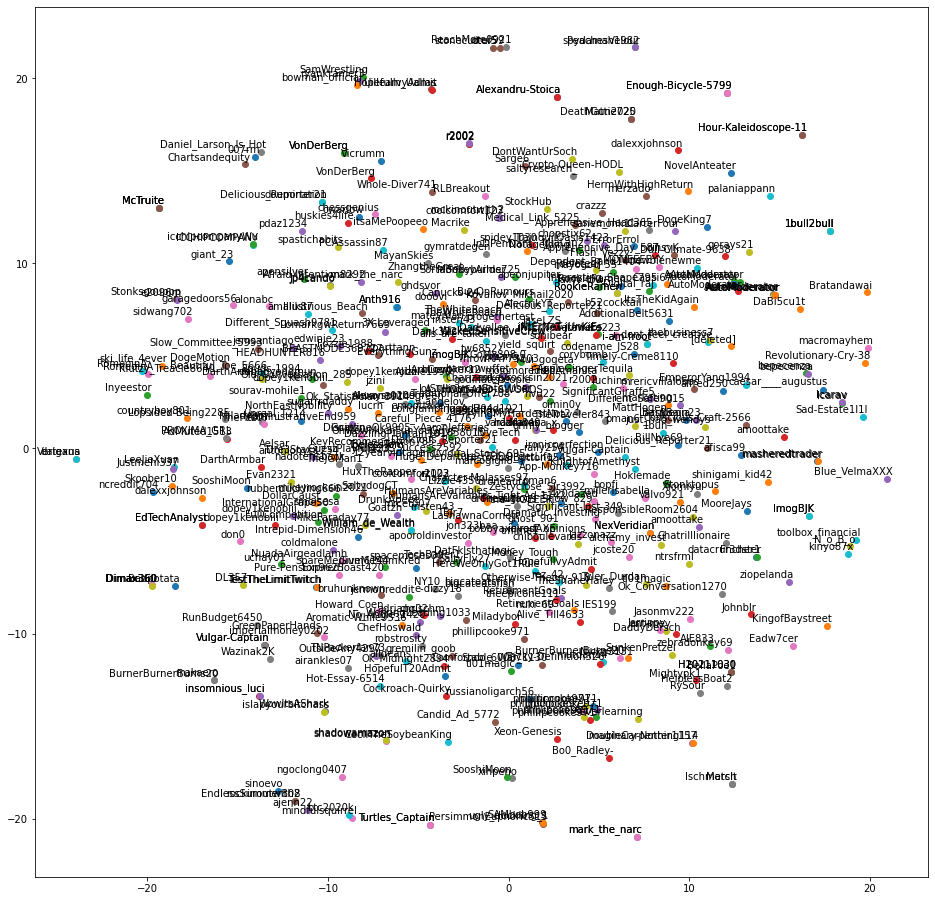

In [18]:
tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
new_values = tsne_model.fit_transform(stored_embeddings[0:500])

x = []
y = []
for value in new_values:
    x.append(value[0])
    y.append(value[1])
        
plt.figure(figsize=(16, 16)) 
for i in range(len(x[0:500])):
    plt.scatter(x[i],y[i])
    plt.annotate(author_list[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
plt.show()